## 分散分析
分散分析は世紀線形モデルに置いて幅広く用いられている検定手法です。
分散分析は平均値の差を検定する手法です。

分散分析は、母集団が正規分布に従うデータにのみ的ゆお可能です。また水準の間で分散の値が異ならないという条件も満たしている必要がある。

### 分散分析の直感的な考え方：F比
分散分析ではデータの変動を「誤差」と「効果」に分離します。

F比 = 効果の分散の大きさ / 誤差の分散の大きさ
このF比が大きい場合、誤差に比べて効果の影響が大きいと判断されます。
母集団分布が等分散正規分布である時のF比の標本分布はF分布と呼ばれる。

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as  sm

%precision 3
%matplotlib inline


In [2]:
# サンプルデータの作成
weather = ["cloudy","cloudy","rainy","rainy","sunny","sunny"]
beer = [6,8,2,4,10,12]

# データフレームにまとめる
weather_beer = pd.DataFrame({
    "beer":beer,
    "weather":weather
})

print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


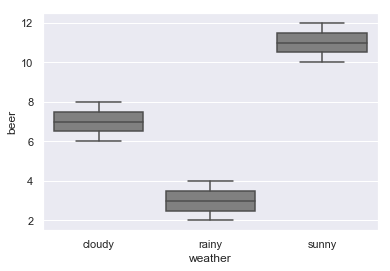

In [4]:
sns.boxplot(x = "weather", y="beer",data = weather_beer, color = "gray")

In [5]:
# 天気ごとの売り上げの平均値を計算します。
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


### 分散分析1：群間・郡内平方和の計算

In [6]:
# 天気の持つ影響
effect = [7,7,3,3,11,11]
#群間の平方和
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2)
squares_model

64.000

In [7]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [8]:
# 郡内の平方和
squares_resid = sp.sum(resid ** 2)
squares_resid

6

### 分散分析2：群間・郡内分散の計算
分散分析では不偏分散と同じように自由度から1を引いた値で分散を割ります。
今回の自由度は以下のように計算されます。

サンプルサイズ - 水準の種類
6 - 3 = 3



In [9]:
df_model = 2 # 群間変動の自由度　水準3種類　 -1 
df_resid = 3 # 郡内変動の自由度 6-3 = 3

# 群間の平方平均(分散)
variance_model = squares_model / df_model
variance_model

32.000

In [10]:
# 郡内の平方平均（分散）
variance_resid = squares_resid / df_resid
variance_resid

2.000

In [11]:
f_ratio = variance_model / variance_resid
f_ratio

16.000

In [12]:
# p値
1 - sp.stats.f.cdf(x=f_ratio,dfn=df_model,dfd=df_resid)

0.025

### statsmodelによる分散分析

In [13]:
anova_model = smf.ols("beer ~ weather",data = weather_beer).fit()
print(sm.stats.anova_lm(anova_model, typ = 2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN
